In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [17]:
from word2number import w2n
import math

In [6]:
df = pd.read_csv("salary_multiple_regression.csv")

In [7]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
df.describe()

,test_score,interview_score,salary
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [9]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [10]:
df.columns

Index(['experience', 'test_score', 'interview_score', 'salary'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [12]:
df.experience = df.experience.fillna("zero")

In [13]:
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
df.test_score = df.test_score.fillna(math.floor(df['test_score'].mean()))

In [19]:
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [24]:
df["experience"] = df["experience"].apply(w2n.word_to_num)

In [25]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [29]:
df['test_score'] = df['test_score'].astype(int)

In [30]:
df

,experience,test_score,interview_score,salary
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,7,7,72000
7,11,7,8,80000


In [31]:
df.corr()

,experience,test_score,interview_score,salary
experience,1.000000,-0.352557,-0.290480,0.908017
test_score,-0.352557,1.000000,0.186655,-0.077524
interview_score,-0.290480,0.186655,1.000000,0.037820
salary,0.908017,-0.077524,0.037820,1.000000


<AxesSubplot:>

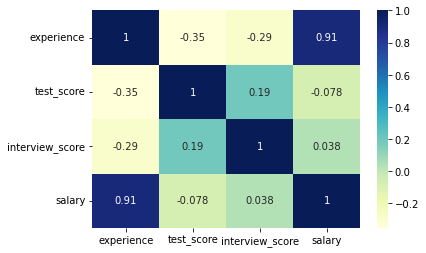

In [32]:
seabornInstance.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
reg = LinearRegression()

In [35]:
reg

LinearRegression()

In [37]:
reg.fit(df[['experience','test_score','interview_score']],df['salary'])

LinearRegression()

In [39]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [42]:
reg.intercept_

14992.65144669314

In [43]:
reg.predict([[2,9,6]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [44]:
reg.predict([[15,9,9]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([98145.81166562])

In [45]:
reg.predict([[50,9,10]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([202572.70975772])